Employee Retention Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Data Files
salary_data_path = "Resources/Salary_Data.csv"
employee_data_path = "Resources/WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Reading in data
salary_data = pd.read_csv(salary_data_path)
employee_data = pd.read_csv(employee_data_path)

In [2]:
# Replace non-finite values (NA or inf) with NaN
salary_data['Age'] = salary_data['Age'].replace([np.inf, -np.inf], np.nan)
salary_data['Years of Experience'] = salary_data['Years of Experience'].replace([np.inf, -np.inf], np.nan)
salary_data['Salary'] = salary_data['Salary'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values in the specified columns
salary_data.dropna(subset=['Age', 'Years of Experience', 'Salary'], inplace=True)

# Clearing decimals from Age, Years of Experience, and Salary columns
salary_data['Age'] = salary_data['Age'].astype(int)
salary_data['Years of Experience'] = salary_data['Years of Experience'].astype(int)
salary_data['Salary'] = salary_data['Salary'].astype(int)

# Filter data for only male and female
filtered_data = salary_data[salary_data['Gender'].isin(['M', 'F'])]

In [3]:
# Group data by gender and calculate summary statistics
summary_by_gender = salary_data.groupby('Gender')['Salary'].describe().round(2)

# Display the summary by gender DataFrame
print("Summary by Gender:")
summary_by_gender


Summary by Gender:


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,3013.0,107889.00,52723.61,500.0,60000.00,105000.0,150000.00,220000.0
Male,3672.0,121389.87,52092.73,350.0,75000.00,120000.0,170000.00,250000.0
Other,14.0,125869.86,44242.38,62852.0,77805.75,158610.0,160786.25,166109.0


In [4]:
# Merge different variations of education levels into unique names
salary_data['Education Level'] = salary_data['Education Level'].replace({
    "Bachelor's": "Bachelor",
    "Bachelor's Degree": "Bachelor",
    "Master's": "Master",
    "Master's Degree": "Master",
    "PhD": "Doctor"
    #"phD": "Doctor"
})

In [5]:
# Group data by education level and calculate summary statistics
summary_by_education = salary_data.groupby('Education Level')['Salary'].describe().round(2)

# Display the summary by education level DataFrame
print("\nSummary by Education Level:")
summary_by_education



Summary by Education Level:


,count,mean,std,min,25%,50%,75%,max
Education Level,,,,,,,,
Bachelor,3021.0,95082.91,44091.79,350.0,60000.0,80000.0,122485.0,250000.0
Doctor,1368.0,165684.83,34330.10,579.0,150000.0,170000.0,190000.0,250000.0
High School,448.0,36706.69,22549.13,25000.0,25000.0,30000.0,38000.0,166109.0
Master,1860.0,130112.06,40640.82,32000.0,101186.0,130000.0,160244.0,228000.0
phD,1.0,120000.00,NaN,120000.0,120000.0,120000.0,120000.0,120000.0


In [6]:
# Group data by job title and calculate summary statistics
summary_by_job_title = salary_data.groupby('Job Title')['Salary'].describe().round(2)

# Display the summary by job title DataFrame
print("\nSummary by Job Title:")
summary_by_job_title


Summary by Job Title:


,count,mean,std,min,25%,50%,75%,max
Job Title,,,,,,,,
Account Manager,1.0,75000.00,NaN,75000.0,75000.00,75000.0,75000.0,75000.0
Accountant,1.0,55000.00,NaN,55000.0,55000.00,55000.0,55000.0,55000.0
Administrative Assistant,2.0,50000.00,7071.07,45000.0,47500.00,50000.0,52500.0,55000.0
Back end Developer,244.0,102352.56,31900.83,51832.0,79941.75,100000.0,132080.5,178284.0
Business Analyst,2.0,77500.00,3535.53,75000.0,76250.00,77500.0,78750.0,80000.0
...,...,...,...,...,...,...,...,...
UX Designer,1.0,80000.00,NaN,80000.0,80000.00,80000.0,80000.0,80000.0
UX Researcher,1.0,65000.00,NaN,65000.0,65000.00,65000.0,65000.0,65000.0
VP of Finance,1.0,200000.00,NaN,200000.0,200000.00,200000.0,200000.0,200000.0


In [7]:
print(salary_data.columns)
#salary_data

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


In [8]:
# Selecting specific columns from the employee_data dataset
selected_columns = employee_data[['Age', 'Attrition', 'Department', 'Education', 'Gender', 'TotalWorkingYears','MonthlyIncome']]

# Print the selected columns
selected_columns

,Age,Attrition,Department,Education,Gender,TotalWorkingYears,MonthlyIncome
0,41,Yes,Sales,2,Female,8,5993
1,49,No,Research & Development,1,Male,10,5130
2,37,Yes,Research & Development,2,Male,7,2090
3,33,No,Research & Development,4,Female,8,2909
4,27,No,Research & Development,1,Male,6,3468
...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Male,17,2571
1466,39,No,Research & Development,1,Male,9,9991
1467,27,No,Research & Development,3,Male,6,6142
1468,49,No,Sales,3,Male,17,5390


In [9]:
# Mapping education numbers to education level labels
education_mapping = {
    1: 'Below College',
    2: 'High School',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Create a new DataFrame with selected columns
selected_columns['Education Level'] = employee_data['Education'].map(education_mapping)
selected_columns['Annual Salary'] = employee_data['MonthlyIncome'] * 12

# Print the new DataFrame
selected_columns

C:\Users\rbutt8262\AppData\Local\Temp\ipykernel_6500\1639911364.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Education Level'] = employee_data['Education'].map(education_mapping)
C:\Users\rbutt8262\AppData\Local\Temp\ipykernel_6500\1639911364.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Annual Salary'] = employee_data['MonthlyIncome'] * 12


,Age,Attrition,Department,Education,Gender,TotalWorkingYears,MonthlyIncome,Education Level,Annual Salary
0,41,Yes,Sales,2,Female,8,5993,High School,71916
1,49,No,Research & Development,1,Male,10,5130,Below College,61560
2,37,Yes,Research & Development,2,Male,7,2090,High School,25080
3,33,No,Research & Development,4,Female,8,2909,Master,34908
4,27,No,Research & Development,1,Male,6,3468,Below College,41616
...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Male,17,2571,High School,30852
1466,39,No,Research & Development,1,Male,9,9991,Below College,119892
1467,27,No,Research & Development,3,Male,6,6142,Bachelor,73704
1468,49,No,Sales,3,Male,17,5390,Bachelor,64680


In [10]:
# Group data by gender and calculate summary statistics
summary_by_genders = selected_columns.groupby('Gender')['Annual Salary'].describe().round(0)

# Display the summary by gender DataFrame
print("Summary by Genders:")
summary_by_genders


Summary by Genders:


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,80239.0,56347.0,13548.0,36444.0,60978.0,104541.0,239676.0
Male,882.0,76566.0,56578.0,12108.0,33834.0,58050.0,97365.0,239988.0


In [11]:
# Group data by education level and calculate summary statistics
summary_by_educations = selected_columns.groupby('Education Level')['Annual Salary'].describe().round(0)

# Display the summary by education level DataFrame
print("\nSummary by Education Level:")
summary_by_educations



Summary by Education Level:


,count,mean,std,min,25%,50%,75%,max
Education Level,,,,,,,,
Bachelor,572.0,78207.0,57809.0,12972.0,33117.0,57144.0,105696.0,239112.0
Below College,170.0,67687.0,53814.0,12108.0,32316.0,46188.0,86043.0,239676.0
Doctor,48.0,99332.0,60737.0,25524.0,56775.0,74436.0,140778.0,235032.0
High School,282.0,74720.0,54296.0,12612.0,36807.0,58698.0,82080.0,235356.0
Master,398.0,81989.0,55886.0,16308.0,41793.0,64098.0,104718.0,239988.0


In [12]:
# Group data by Department and calculate summary statistics
summary_by_department = selected_columns.groupby('Department')['Annual Salary'].describe().round(0)

# Display the summary by job title DataFrame
print("\nSummary by Departments:")
summary_by_department


Summary by Departments:


,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Human Resources,63.0,79854.0,69465.0,18660.0,31728.0,46632.0,100950.0,236604.0
Research & Development,961.0,75375.0,58750.0,12108.0,32892.0,52488.0,91860.0,239988.0
Sales,446.0,83510.0,48705.0,12624.0,53355.0,69054.0,105321.0,238164.0


In [13]:
# Identify unique columns in salary_data
unique_salary_data = salary_data.loc[:, ~salary_data.columns.duplicated()]

# Save selected_columns DataFrame as a CSV file
selected_columns.to_csv('selected_columns_output.csv', index=False)

# Save unique_salary_data DataFrame as a CSV file
unique_salary_data.to_csv('salary_data_output.csv', index=False)

In [22]:
# Read the output CSV files into DataFrames
salary_data_output = pd.read_csv('salary_data_output.csv')
selected_columns_output = pd.read_csv('selected_columns_output.csv')

# Rename the 'Selected Age' column in selected_columns_output to 'Age'
selected_columns_output.rename(columns={'Selected Age': 'Age'}, inplace=True)

# Concatenate the DataFrames vertically (along rows)
combined_dataset = pd.concat([salary_data_output, selected_columns_output], ignore_index=True)

# Display the combined dataset
combined_dataset

,Selected_Age,Gender,Selected_Education,Job Title,Years of Experience,Salary,Age,Attrition,Department,Education,TotalWorkingYears,MonthlyIncome,Education Level,Annual Salary
0,32.0,Male,Bachelor,Software Engineer,5.0,90000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.0,Female,Master,Data Analyst,3.0,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45.0,Male,Doctor,Senior Manager,15.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36.0,Female,Bachelor,Sales Associate,7.0,60000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52.0,Male,Master,Director,20.0,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,NaN,Male,NaN,NaN,NaN,NaN,36.0,No,Research & Development,2.0,17.0,2571.0,High School,30852.0
8165,NaN,Male,NaN,NaN,NaN,NaN,39.0,No,Research & Development,1.0,9.0,9991.0,Below College,119892.0
8166,NaN,Male,NaN,NaN,NaN,NaN,27.0,No,Research & Development,3.0,6.0,6142.0,Bachelor,73704.0
8167,NaN,Male,NaN,NaN,NaN,NaN,49.0,No,Sales,3.0,17.0,5390.0,Bachelor,64680.0


In [14]:
import pandas as pd

# Read the output CSV files into DataFrames
salary_data_output = pd.read_csv('salary_data_output.csv')
selected_columns_output = pd.read_csv('selected_columns_output.csv')

# Rename the columns in each DataFrame
salary_data_output.rename(columns={'Selected_Age': 'Age', 'Selected_Education': 'Education Level', 'Years of Experience': 'TotalWorkingYears', 'Salary': 'Annual Salary'}, inplace=True)
selected_columns_output.rename(columns={'Selected_Age': 'Age', 'Selected_Education': 'Education Level', 'Years of Experience': 'TotalWorkingYears', 'Selected_AnnualSalary': 'Annual Salary'}, inplace=True)

# Select only the desired fields from each dataset
salary_data_output = salary_data_output[['Age', 'Gender', 'Education Level', 'TotalWorkingYears', 'Annual Salary']]
selected_columns_output = selected_columns_output[['Age', 'Gender', 'TotalWorkingYears', 'Education Level', 'Annual Salary']]

# Merge the datasets based on common columns
merged_dataset = pd.merge(salary_data_output, selected_columns_output, on=['Age', 'Gender', 'Education Level', 'TotalWorkingYears'], how='inner')

# Select only the desired fields in the merged dataset
merged_dataset = merged_dataset[['Age', 'Gender', 'Education Level', 'TotalWorkingYears', 'Annual Salary_x',]]

# Rename the columns in the merged dataset
merged_dataset.rename(columns={'Annual Salary_x': 'Annual Salary'}, inplace=True)

merged_dataset

,Age,Gender,Education Level,TotalWorkingYears,Annual Salary
0,32,Male,Bachelor,5,90000
1,32,Male,Bachelor,5,75000
2,32,Male,Bachelor,5,135000
3,32,Male,Bachelor,5,115000
4,32,Male,Bachelor,5,120000
...,...,...,...,...,...
3438,32,Male,Doctor,8,80000
3439,46,Male,Master,14,140000
3440,46,Male,Master,14,140000
3441,46,Male,Master,14,140000


In [15]:
# Group data by gender and calculate summary statistics
summary_by_gender = merged_dataset.groupby('Gender')['Annual Salary'].describe().round(0)

# Display the summary by gender DataFrame
print("Summary by Gender:")
summary_by_gender


Summary by Gender:


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1256.0,89586.0,37148.0,500.0,58000.0,90000.0,115000.0,210000.0
Male,2187.0,110713.0,43804.0,350.0,75000.0,110000.0,140000.0,195000.0


In [16]:
# Group data by education level and calculate summary statistics
summary_by_education = merged_dataset.groupby('Education Level')['Annual Salary'].describe().round(0)

# Display the summary by education level DataFrame
print("\nSummary by Education Level:")
summary_by_education



Summary by Education Level:


,count,mean,std,min,25%,50%,75%,max
Education Level,,,,,,,,
Bachelor,2159.0,96024.0,41450.0,350.0,65000.0,88552.0,125000.0,210000.0
Doctor,61.0,149113.0,24560.0,80000.0,130000.0,155000.0,165000.0,195000.0
High School,149.0,36978.0,23257.0,25000.0,30000.0,30000.0,35000.0,165919.0
Master,1074.0,123584.0,32298.0,40000.0,100000.0,120000.0,140000.0,196000.0


In [17]:
# Group data by gender and calculate summary statistics
salary_by_years = merged_dataset.groupby('TotalWorkingYears')['Annual Salary'].describe().round(0)

# Display the summary by gender DataFrame
print("Summary of Salary by Years of Experience:")
salary_by_years


Summary of Salary by Years of Experience:


,count,mean,std,min,25%,50%,75%,max
TotalWorkingYears,,,,,,,,
1,382.0,45825.0,19488.0,350.0,30000.0,35000.0,55000.0,95000.0
2,84.0,77583.0,29103.0,35000.0,45000.0,70000.0,110000.0,110000.0
3,316.0,62772.0,18416.0,40000.0,55000.0,55000.0,65000.0,130000.0
4,463.0,82767.0,29077.0,500.0,65000.0,73895.0,80000.0,160000.0
5,340.0,110042.0,37719.0,50000.0,80000.0,90000.0,160000.0,165000.0
6,542.0,102306.0,22161.0,65000.0,85000.0,95000.0,115000.0,175000.0
7,124.0,110006.0,19795.0,65000.0,93750.0,110000.0,130000.0,180000.0
8,241.0,115129.0,22771.0,70000.0,100000.0,120000.0,135000.0,180000.0
9,412.0,144222.0,28232.0,95000.0,125000.0,140000.0,150000.0,195000.0


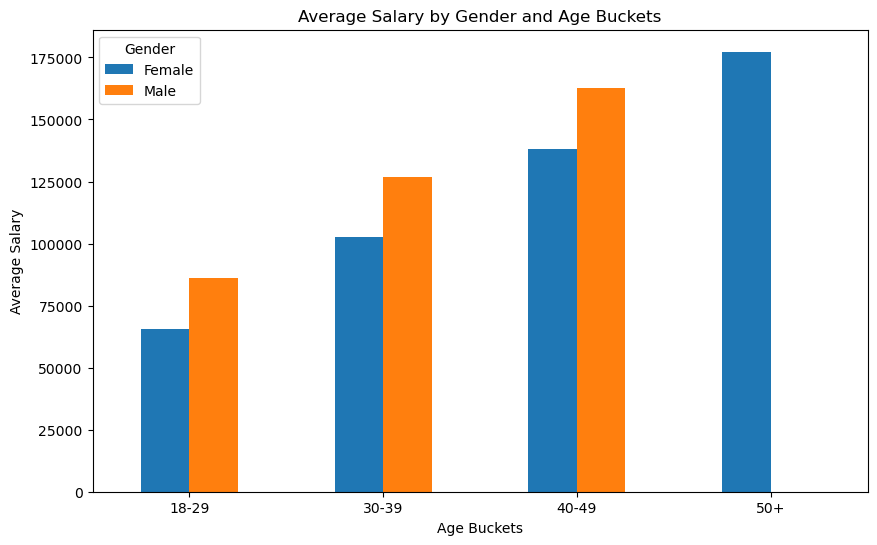

In [22]:
#Create a Bar graphs to show the average salary bewteen men and women and divide them into the following age buckets. 18- 29| 30-39 |40-49| 50+

# Define the age buckets
age_buckets = ['18-29', '30-39', '40-49', '50+']

# Group the merged dataset by gender and age buckets and calculate the average salary
average_salary_by_gender_age = merged_dataset.groupby(['Gender', pd.cut(merged_dataset['Age'], [18, 29, 39, 49, 150], labels=age_buckets)])['Annual Salary'].mean().reset_index()

# Pivot the data to have gender as columns and age buckets as rows
pivot_table = average_salary_by_gender_age.pivot(index='Age', columns='Gender', values='Annual Salary')

# Plot the bar graph
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Buckets')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender and Age Buckets')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

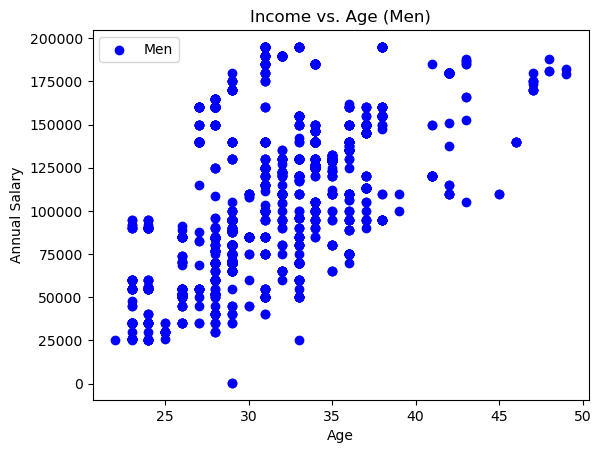

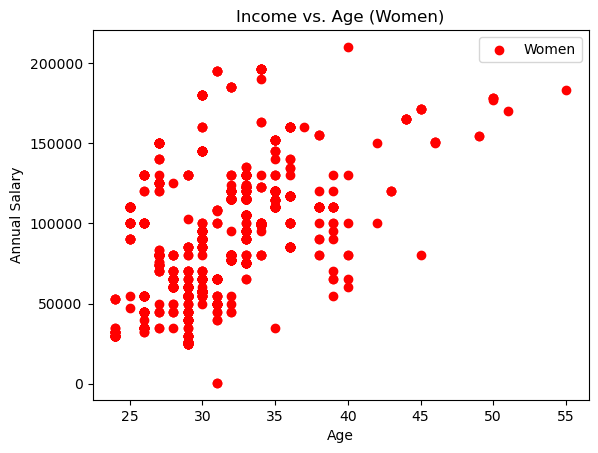

In [25]:
#Create two scatter plots to show the income of each employee in relation to employee age. One graph should be plot for men and one should be plot for women.

# Separate the data for men and women
men_data = merged_dataset[merged_dataset['Gender'] == 'Male']
women_data = merged_dataset[merged_dataset['Gender'] == 'Female']

# Create a scatter plot for men
plt.scatter(men_data['Age'], men_data['Annual Salary'], color='blue', label='Men')

plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Income vs. Age (Men)')
plt.legend()
plt.show()

# Create a scatter plot for women
plt.scatter(women_data['Age'], women_data['Annual Salary'], color='red', label='Women')

plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Income vs. Age (Women)')
plt.legend()
plt.show()

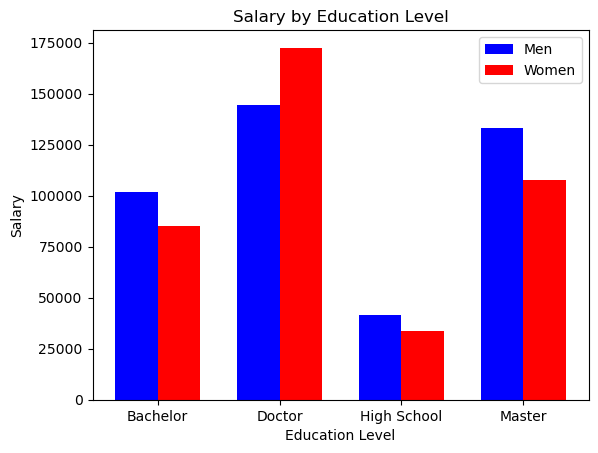

In [28]:
#Create two bar graphs to show different levels of education (x axis) in relation to salary (y axis) in differnt buckets - men in one graph women in the other

# Group the data by education level and calculate the average salary
men_avg_salary_by_education = men_data.groupby('Education Level')['Annual Salary'].mean()
women_avg_salary_by_education = women_data.groupby('Education Level')['Annual Salary'].mean()

# Set the x-axis positions for the bars
x = range(len(men_avg_salary_by_education))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot for men
plt.bar(x, men_avg_salary_by_education, width=bar_width, color='blue', label='Men')

# Create the bar plot for women
plt.bar([i + bar_width for i in x], women_avg_salary_by_education, width=bar_width, color='red', label='Women')

# Set the x-axis tick labels
plt.xticks([i + bar_width/2 for i in x], men_avg_salary_by_education.index)

plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Salary by Education Level')
plt.legend()
plt.show()

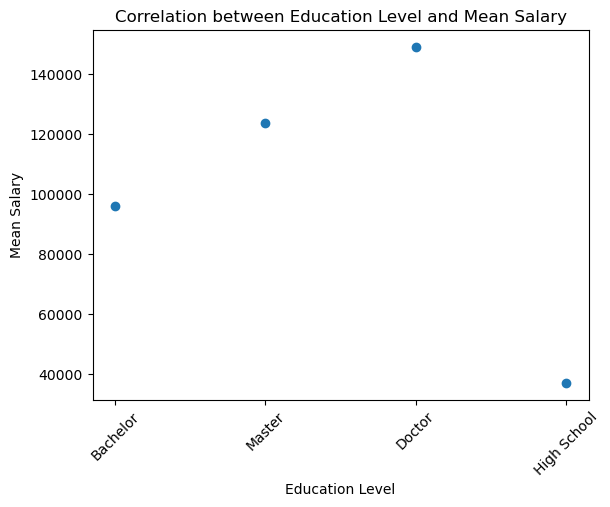

In [31]:
#Create a scatter plot to see if there a correlation between different levels of education (x axis) in relation to each employee’ actual salary (y axis) for all employees

# Group the data by education level and get the mean salary
avg_salary_by_education = merged_dataset.groupby('Education Level')['Annual Salary'].mean()

# Get the unique education levels
education_levels = merged_dataset['Education Level'].unique()

# Get the corresponding mean salaries for each education level
mean_salaries = [avg_salary_by_education[level] for level in education_levels]

# Create the scatter plot
plt.scatter(education_levels, mean_salaries)

# Set the labels and title
plt.xlabel('Education Level')
plt.ylabel('Mean Salary')
plt.title('Correlation between Education Level and Mean Salary')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

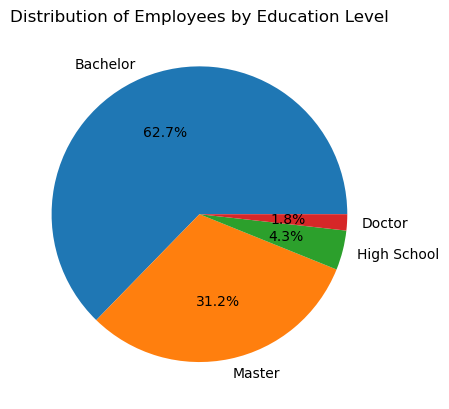

In [32]:
#Pie chart to - show the percentage of employees and number of employees with different levels of education

# Count the number of employees for each education level
education_counts = merged_dataset['Education Level'].value_counts()

# Get the labels and sizes for the pie chart
labels = education_counts.index
sizes = education_counts.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Employees by Education Level')

# Display the chart
plt.show()